# Expectation Decider

In [37]:
import pandas as pd 
import numpy as np 

In [38]:
students_data = pd.read_csv("students_data.csv")
print(students_data.head())
print(students_data.shape)


   study_hours  attendance group_discussion  previous_test_score  \
0            2          48               No                   28   
1            3          52               No                   35   
2            4          58               No                   42   
3            5          62               No                   45   
4            6          68               No                   49   

  final_exam_pass  
0            Fail  
1            Fail  
2            Fail  
3            Fail  
4            Fail  
(200, 5)


## Understanding the Basics
1) What is probability?
- probability is the likelihood of an event occuring. for example the likelihood of tails showing up if I toss a coin.

2) Key terminologies in probability?
- it includes:-
1. event :- task which is happening.
2. sample space:- amount to possible outcomes that can be derived.
3. the probability is always between 0 and 1.
4. random experiment:- A process whose probability cannot be derived before it's happening.

In [39]:
# 3) three examples of event from the dataset

#1st
prob_study_hour_more_5 = len(students_data[students_data["study_hours"]>5]) / len(students_data["study_hours"])
print(f"probability of students with study hour more than 5:-{prob_study_hour_more_5}")

#2nd
prob_students_exam_pass = len(students_data[students_data["final_exam_pass"] == "Pass"]) / len(students_data["final_exam_pass"])
print(f"probability of students passing the final exam:-{prob_students_exam_pass}")

#3rd
prob_students_join_grp_discuss = len(students_data[students_data["group_discussion"] == "Yes"]) / len(students_data["group_discussion"])
print(f"probability of students joining group discussion:-{prob_students_join_grp_discuss}")


probability of students with study hour more than 5:-0.74
probability of students passing the final exam:-0.545
probability of students joining group discussion:-0.675


## Types of events

In [40]:
# empirical probability

prob_students_exam_pass = len(students_data[students_data["final_exam_pass"] == "Pass"]) / len(students_data["final_exam_pass"])
print(f"probability of students passing the final exam:-{prob_students_exam_pass}")

# theoritical probability
sample_space = ["pass","fail"]
prob_pass = 1 / 2
print(f"probability of pass:-{prob_pass}")


probability of students passing the final exam:-0.545
probability of pass:-0.5


## Random Variable and Probability Distribution

In [41]:
# X = Number of students passing out of 3 randomly selected students
sample_space_random_variable_X = {0,1,2,3}
# 0 = no student passes
# 1 = one out of three passed
# 2 = two out of three passed
# 3 = all three passed

print(f"probability of students passing the final exam:-{prob_students_exam_pass:.2f}")
prob_students_exam_fail = 1 - prob_students_exam_pass
print(f"probability of students failing the final exam:-{prob_students_exam_fail:.2f}")


probability of students passing the final exam:-0.55
probability of students failing the final exam:-0.45


In [42]:
mean_expected_value_of_X = 0*(1/4) + 1*(1/4) + 2*(1/4) + 3*(1/4)
print(mean_expected_value_of_X)

1.5


In [43]:
variance_of_random_variable = (0 - mean_expected_value_of_X) ** 2 * (1/4) + (1 - mean_expected_value_of_X) ** 2 * (1/4) 
+ (2 - mean_expected_value_of_X) ** 2 * (1/4) + (3 - mean_expected_value_of_X) ** 2 * (1/4)
print(variance_of_random_variable)

0.625


In [44]:
probaility_distribution_table = pd.DataFrame({"X":[0,1,2,3],"P[X]":[0.0942,0.3385,0.4054,0.1619]})
print("probability distribution Table")
print(probaility_distribution_table)

probability distribution Table
   X    P[X]
0  0  0.0942
1  1  0.3385
2  2  0.4054
3  3  0.1619


## Venn daigram in probability

In [45]:
import matplotlib.pyplot as plt 
from matplotlib_venn import venn2

Only Study > 10 hrs: 1
Only Attendance > 80%: 13
Both conditions: 82


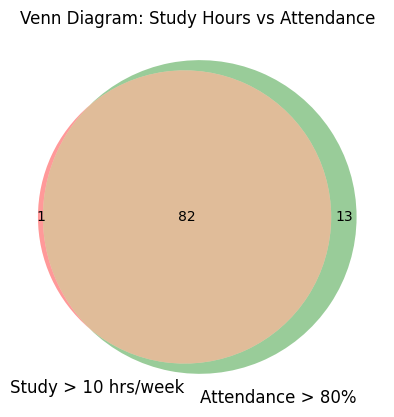

In [46]:
study_more_than_10hours = len(students_data[students_data["study_hours"]>10])
attend_more_80percent_class = len(students_data[students_data["attendance"]>80])

both_sets = len(students_data[(students_data["study_hours"] > 10) & (students_data["attendance"] > 80)])
only_study_more_than_10hours = study_more_than_10hours - both_sets
only_attend_more_80percent_class = attend_more_80percent_class - both_sets


print("Only Study > 10 hrs:", only_study_more_than_10hours)
print("Only Attendance > 80%:", only_attend_more_80percent_class)
print("Both conditions:", both_sets)

venn2(subsets=(only_study_more_than_10hours,only_attend_more_80percent_class, both_sets),
      set_labels=('Study > 10 hrs/week', 'Attendance > 80%'))

plt.title("Venn Diagram: Study Hours vs Attendance")
plt.savefig("venn diagram", dpi=300)
plt.show()


## Contigency Table and Probability Calculations

In [47]:
contingency_table = pd.crosstab(students_data["group_discussion"],students_data["final_exam_pass"],margins=True)
print(contingency_table)

final_exam_pass   Fail  Pass  All
group_discussion                 
No                  65     0   65
Yes                 26   109  135
All                 91   109  200


In [48]:
# joint probability
joint_probability = len(students_data[(students_data["group_discussion"] == "Yes") & (students_data["final_exam_pass"] == "Pass")]) / len(students_data)
print(joint_probability)

0.545


In [49]:
contingency_table_joint = pd.crosstab(students_data["group_discussion"],students_data["final_exam_pass"],normalize=True)
print(contingency_table_joint)

final_exam_pass    Fail   Pass
group_discussion              
No                0.325  0.000
Yes               0.130  0.545


In [50]:
# marginal probability

prob_students_exam_pass = len(students_data[students_data["final_exam_pass"] == "Pass"]) / len(students_data["final_exam_pass"])
print(f"probability of students passing the final exam:-{prob_students_exam_pass}")
print(contingency_table)

probability of students passing the final exam:-0.545
final_exam_pass   Fail  Pass  All
group_discussion                 
No                  65     0   65
Yes                 26   109  135
All                 91   109  200


In [51]:
#conditinal probability

pass_given_participation = len(students_data[(students_data["group_discussion"] == "Yes") & (students_data["final_exam_pass"] == "Pass")]) / len(students_data[(students_data["group_discussion"] == "Yes")])
print(pass_given_participation)

0.8074074074074075


In [52]:
contingency_table_conditional = pd.crosstab(students_data["group_discussion"],students_data["final_exam_pass"],normalize="index")
print(contingency_table_conditional)

final_exam_pass       Fail      Pass
group_discussion                    
No                1.000000  0.000000
Yes               0.192593  0.807407


## understanding relationships

In [53]:
print('''
      1). The main intuition behind conditional probability states that find probability of event A given that event B has already occured.
          In this the probability is being derives from two responsible events rather than the whole table.
      
      2) The students attending the group discussion and passing the exam are way more. 
         The ones that attended the group discussions and simultanoeusly passed the exams are slightly more than 80%.
         whereas the students not attending the discussion and passing the exam are none this goes to show that the two events are dependent on each other.
         
         Dependent :- Two variable shares a relationship.
         Independent :- Two variable shares no relationship.and changes on their own.
         Mutually exclusive :- The two variable are on thier own and has no common ground.
      ''')


      1). The main intuition behind conditional probability states that find probability of event A given that event B has already occured.
          In this the probability is being derives from two responsible events rather than the whole table.

      2) The students attending the group discussion and passing the exam are way more. 
         The ones that attended the group discussions and simultanoeusly passed the exams are slightly more than 80%.
         whereas the students not attending the discussion and passing the exam are none this goes to show that the two events are dependent on each other.

         Dependent :- Two variable shares a relationship.
         Independent :- Two variable shares no relationship.and changes on their own.
         Mutually exclusive :- The two variable are on thier own and has no common ground.
      


## Bayes Theorem application

In [54]:
total = len(students_data)

Prob_pass_exam = len(students_data[students_data['final_exam_pass'] == 'Pass']) / total
print("P(Pass) =", round(Prob_pass_exam, 4))

Prob_fail_exam = len(students_data[students_data['final_exam_pass'] == 'Fail']) / total
print("P(Fail) =", round(Prob_fail_exam, 4))

Prob_high_attendance = len(students_data[students_data['attendance'] > 80]) / total
print("P(High Attendance) =", round(Prob_high_attendance, 4))

Prob_high_given_pass = len(students_data[(students_data['final_exam_pass'] == 'Pass') &(students_data['attendance'] > 80)]) / len(students_data[students_data['final_exam_pass'] == 'Pass'])
print("P(High Attendance | Pass) =", round(Prob_high_given_pass, 4))

Prob_high_given_fail = len(students_data[(students_data['final_exam_pass'] == 'Fail') &(students_data['attendance'] > 80)]) / len(students_data[students_data['final_exam_pass'] == 'Fail'])
print("P(High Attendance | Fail) =", round(Prob_high_given_fail, 4))

bayes_prob_pass_given_high_attendance = (Prob_high_given_pass * Prob_pass_exam) / Prob_high_attendance
print("bayes Theorem P(Pass | High Attendance) =", bayes_prob_pass_given_high_attendance)


P(Pass) = 0.545
P(Fail) = 0.455
P(High Attendance) = 0.475
P(High Attendance | Pass) = 0.8624
P(High Attendance | Fail) = 0.011
bayes Theorem P(Pass | High Attendance) = 0.9894736842105265
